In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data1 = pd.read_csv("data_clean.csv")
print(data1)

In [ ]:
data1.info()

In [ ]:
data1['Month']=pd.to_numeric(data1['Month'],errors='coerce')
data1.info()

In [ ]:
data1[data1.duplicated(keep = False)]

In [ ]:
data1.rename({'Soalr.R': 'Solar'}, axis=1, inplace = True)
data1

In [ ]:
data1.info()

In [ ]:
data1.isnull().sum()

In [ ]:
cols = data1.columns
colours = ['black', 'yellow']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours),cbar = True)

In [ ]:
median_Ozone = data1["Ozone"].median()
mean_Ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_Ozone)
print("Mean of Ozone: ", mean_Ozone)

In [ ]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

In [ ]:
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

In [12]:
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

NameError: name 'mode_weather' is not defined

In [13]:
print(data1["Month"].value_counts())
mode_Month = data1["Month"].mode()[0]
print(mode_Month)

Month
9.0    34
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64
9.0


In [14]:
data1.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7.4,67,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,70,9.0,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9.0,27,2010,77,S
156,157,14.0,191.0,14.3,75,9.0,28,2010,75,S
157,158,18.0,131.0,8.0,76,9.0,29,2010,76,C


In [15]:
data1.reset_index(drop=True)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,72,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,74,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,56,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,70,9.0,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9.0,27,2010,77,S
156,157,14.0,191.0,14.3,75,9.0,28,2010,75,S


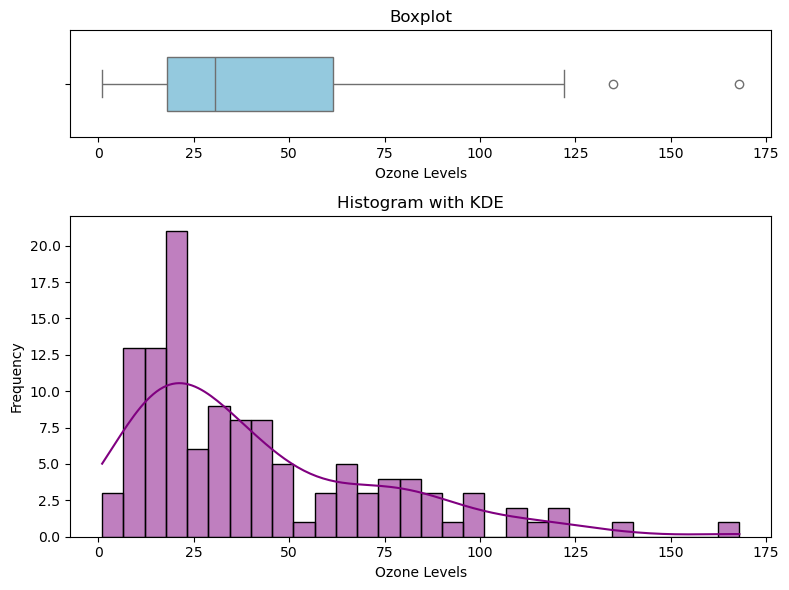

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1,3]})
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Violin Plot')

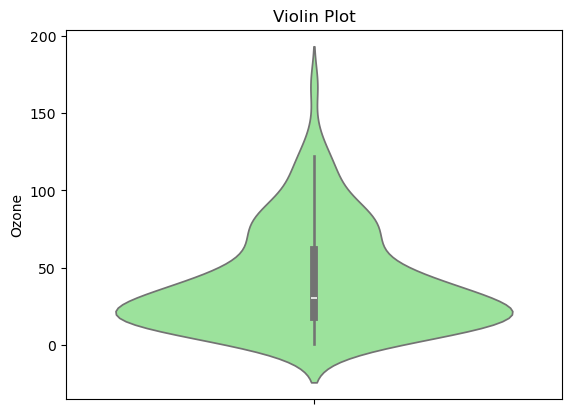

In [24]:
# create a figure for violin plot
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin Plot")


[array([], dtype=float64)]

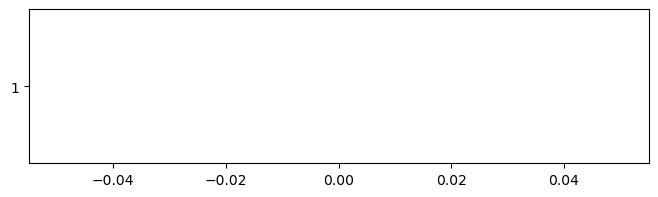

In [49]:
plt.figure(figsize=(8,2))
boxplot_data = plt.boxplot(data1['Ozone'], vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

In [53]:
#method 2 for outlier detection
data1["Ozone"].describe()


count    120.000000
mean      41.583333
std       32.620709
min        1.000000
25%       18.000000
50%       30.500000
75%       61.500000
max      168.000000
Name: Ozone, dtype: float64

In [57]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
        print(x)

168.0


C:\Users\jangi\AppData\Local\Temp\ipykernel_23284\3121128980.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\jangi\AppData\Local\Temp\ipykernel_23284\3121128980.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


Text(0.5, 0, 'theoretical Qunatiles')

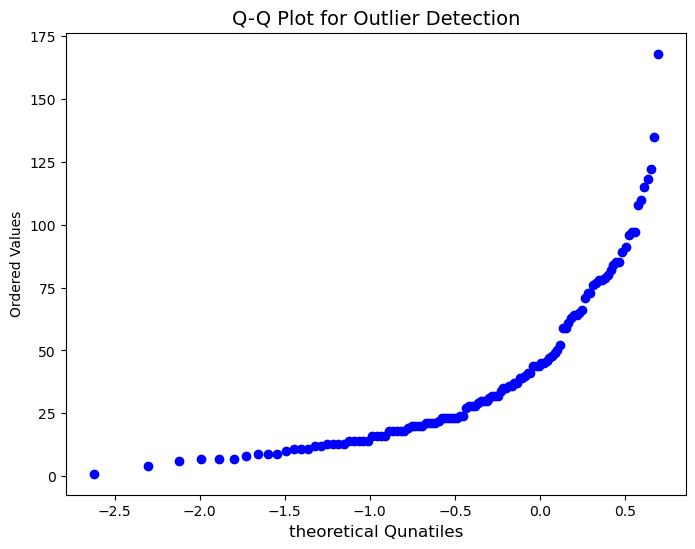

In [61]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("theoretical Qunatiles", fontsize=12)

observation from Q-Q plt
1) the data does not follow normal distribution as the data points are evitating significantly away from the red line
2) the data shows a right-skewed distribution and possible outliers 



In [ ]:
#plpot Q-Q plot for solar column